In [ ]:
!pip3 install librosa
!pip3 install numba==0.48


     |████████████████████████████████| 3.5 MB 4.4 MB/s 
     |████████████████████████████████| 20.2 MB 64.8 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# import librosa
# import numpy as np
# audio_data = "/content/drive/My Drive/101_1b1_Al_sc_Meditron.wav"
# x , sr = librosa.load(audio_data)
# print(type(x), type(sr))
# print(x.shape, sr)

In [2]:
import librosa
import numpy as np
audio_data = "/content/drive/My Drive/003.wav"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(198600,) 22050


In [3]:
librosa.load(audio_data, sr=44100)

(array([3.7506104e-02, 2.8747559e-02, 2.0080566e-02, ..., 5.4931641e-04,
        4.8828125e-04, 3.0517578e-05], dtype=float32), 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

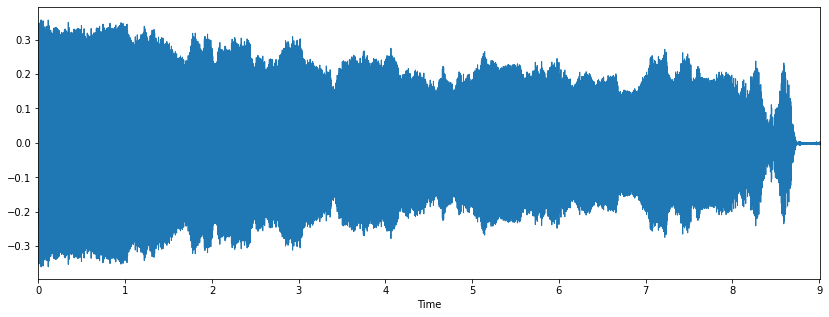

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

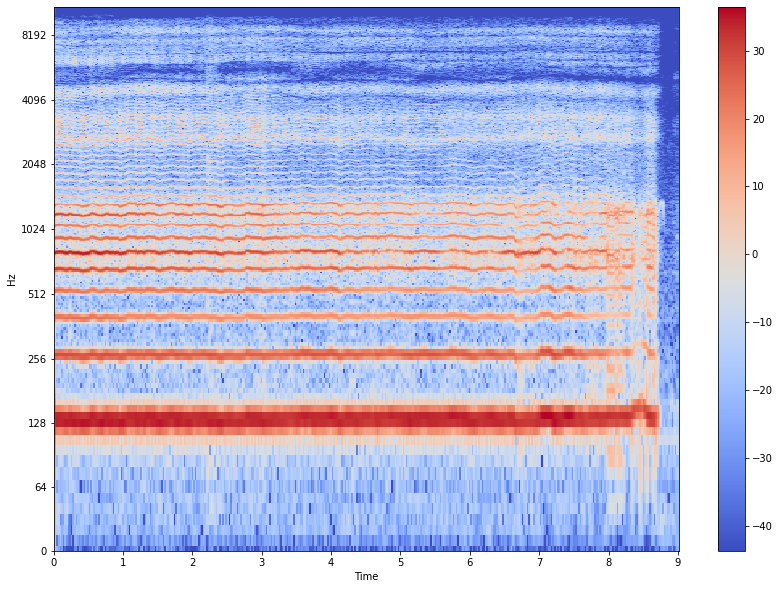

In [ ]:
# Spectrogram
import matplotlib.pyplot as plt
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 10))
 
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

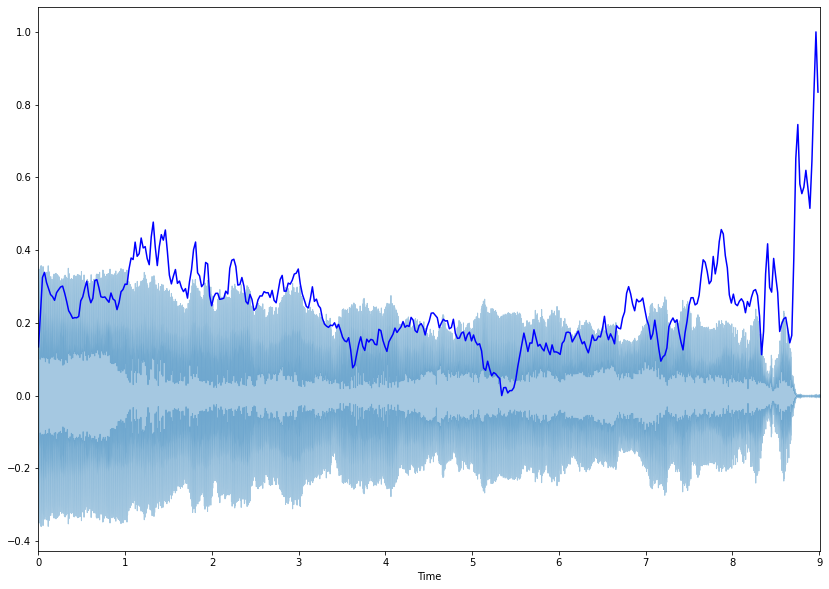

In [ ]:
# Spectral Centroid
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
plt.figure(figsize=(14, 10))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

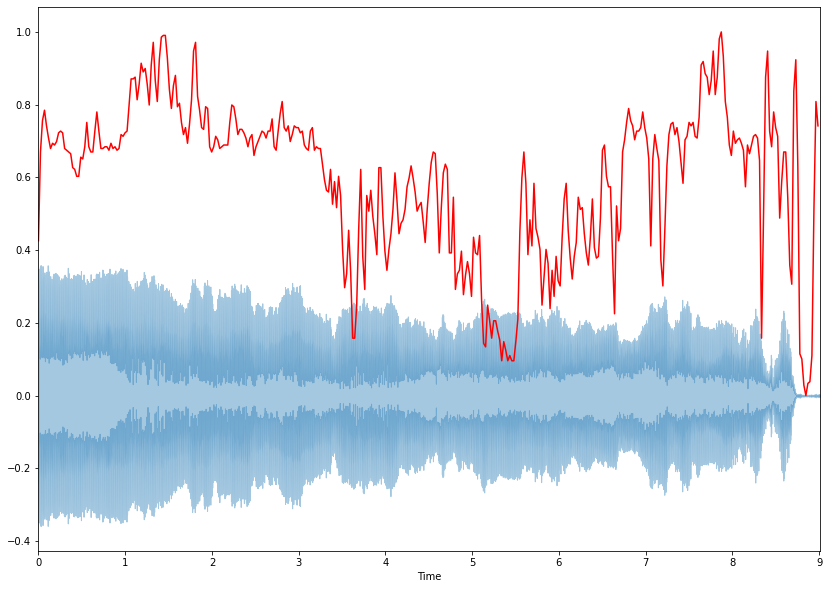

In [ ]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(14, 10))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

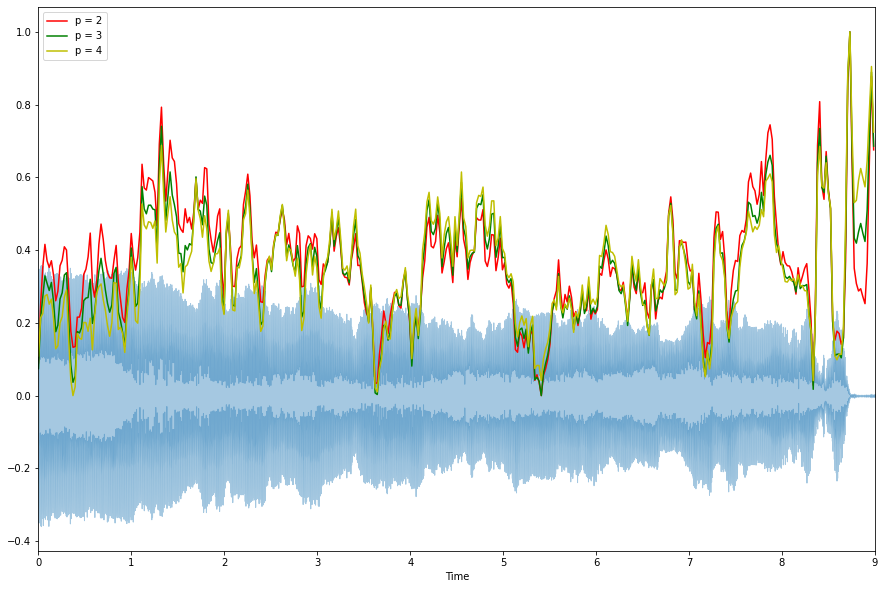

In [ ]:
# Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 10))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

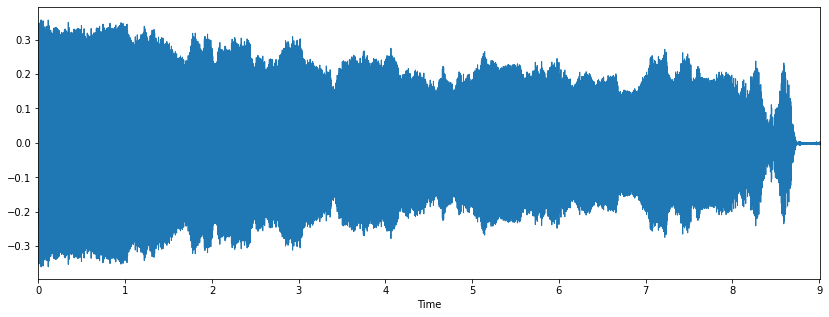

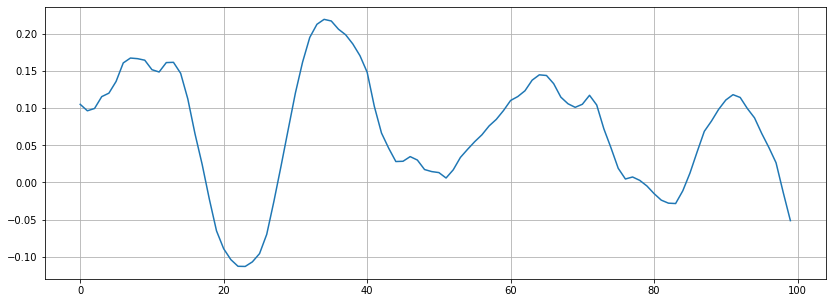

In [ ]:
# Zero-Crossing Rate
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

5


(20, 388)


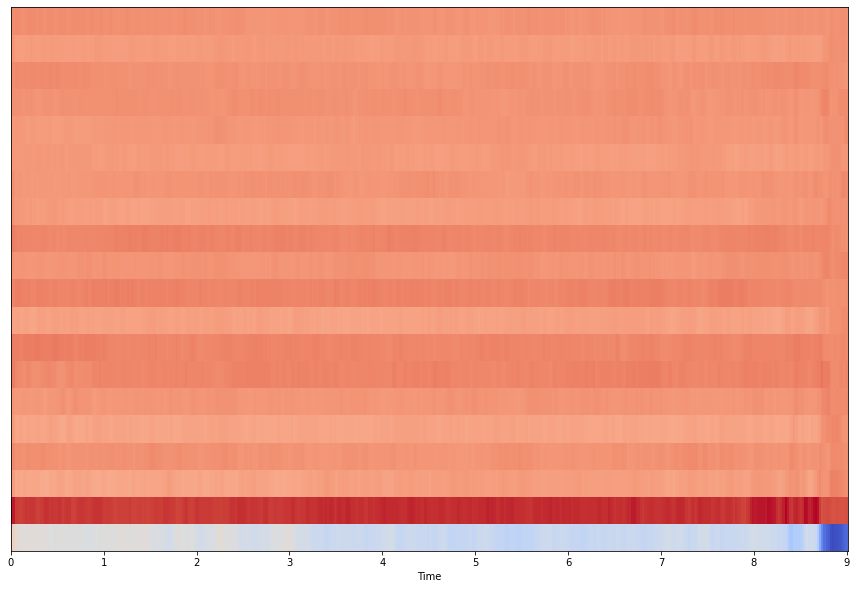

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
librosa.load(audio_data, sr=44100)

(array([3.7506104e-02, 2.8747559e-02, 2.0080566e-02, ..., 5.4931641e-04,
        4.8828125e-04, 3.0517578e-05], dtype=float32), 44100)

In [ ]:
ipd.Audio(audio_data)

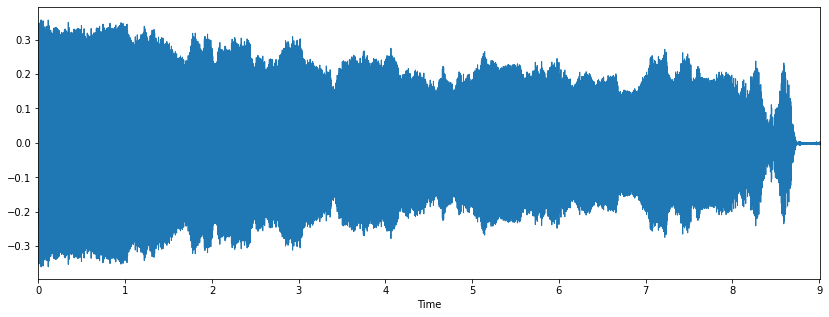

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

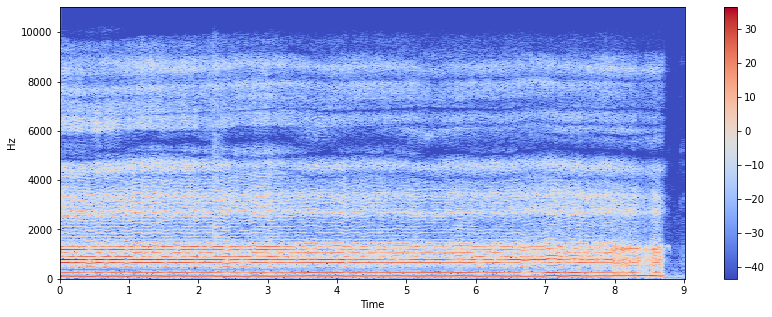

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

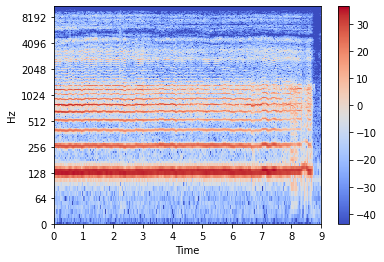

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# (775,)
# # Computing the time variable for visualization
# plt.figure(figsize=(12, 4))frames = range(len(spectral_centroids))
# t = librosa.frames_to_time(frames)
# # Normalising the spectral centroid for visualisation
# def normalize(x, axis=0):
#     return sklearn.preprocessing.minmax_scale(x, axis=axis)
# #Plotting the Spectral Centroid along the waveform
# librosa.display.waveplot(x, sr=sr, alpha=0.4)
# plt.plot(t, normalize(spectral_centroids), color='b')

(216,)

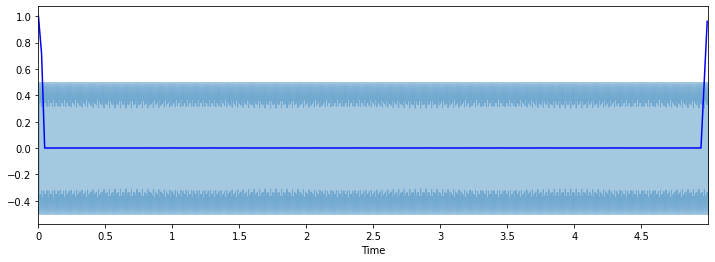

In [ ]:
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

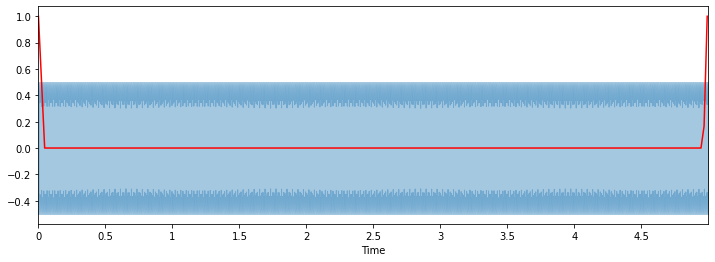

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

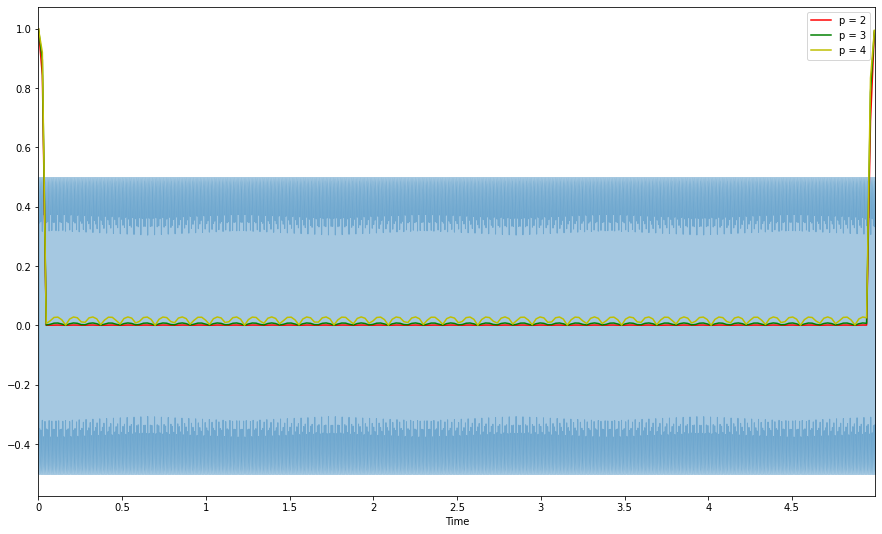

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [ ]:
mfccs = librosa.feature.mfcc(x, sr)
print(mfccs.shape)


(20, 216)


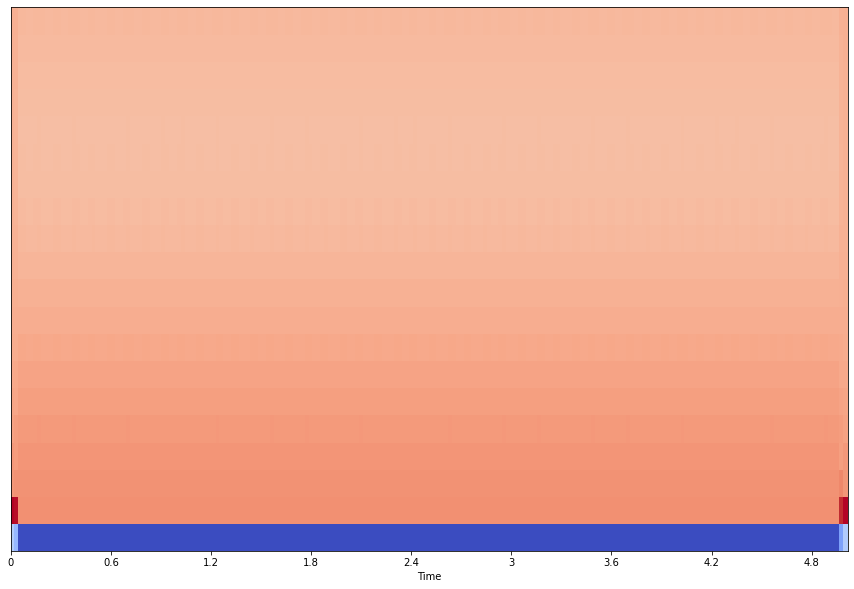

In [ ]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')